# Predicting Parkinson's Disease
This notebook uses the the dataset from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification) to practice classification problem through popular classification models. For each model, the algorithm, and a related topic if any, will be discussed before application. Afterwards, there will be a review on modeling performance. 

## Overview


### I. Data Preparation
- Load and Process Data
- Problem Definition

### II. Modeling

Each modeling section consists of **an brief intro, the algorithm, discussion on related topics, and application** on the dataset.

1. kNN
    - Non-parametric Models
    - Algorithm
2. Naive Bayes  
    - Bayes Classifier
    - Algorithm
    - Generative Model vs. Discriminative Model
3. Logistic Regression
    - Sigmoid Function
    - Maximum Likelihood Estimation
    - Algorithm
    - (Also see Appendix A & B for related topics)
4. Support Vector Machine
    - Convex Sets and Convex Hulls
    - Algorithm
    - Soft-Margin SVM
5. Kernel SVM
    - Kernel
    - Mercer's theorem
    - RBF
    - Algorithm
6. Decision Tree

### III. Model Improvement
- PCA
- Pipeline

### IV. Model Selection
- ROC Curve
- Classification Report

### V. Appendix
- Appendix A: Concepts for Logistic Regression
    - A1. Binary Classification
    - A2. Log Odds
    - A3. Linear Discriminant Analysis

- Appendix B: Linear Classifiers
    - B1. Definition
    - B2. Linear Separability
    - B3. Methods
    
### References for Model Introduction and Algorithms

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## I. Data Preparation
### Load and Process Data

In [2]:
df = pd.read_csv('../project-parkinsons-disease-classification/data/pd_speech_features.csv', 
                 header=1)

In [3]:
df.shape

(756, 755)

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


The last column, class, is the target variable that we want to predict.

In [5]:
df.id.nunique()

252

In [6]:
print('Summary of attribute datatypes:\n', df.dtypes.value_counts(), sep="")

Summary of attribute datatypes:
float64    749
int64        6
dtype: int64


In [7]:
print("Number of null values:", df.isnull().sum().sum())

Number of null values: 0


The data consists of 3 records for each patient, and all the columns, except for gender, seem to be numeric. Therefore, gender will be transformed into categorical variable.

In [8]:
df.gender = df.gender.astype('category')

In [9]:
# Remove id column and get X and y datasets
X = df.drop('id', axis = 1).iloc[:,:-1]
y = df.drop('id', axis = 1).iloc[:,-1]

In [10]:
X.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [11]:
y.value_counts()

1    564
0    192
Name: class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X_train_origin.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
649,0,0.84056,0.65446,0.47962,347,346,0.005573,0.000075,0.00147,0.000008,...,7.4510,122.7173,92.5575,68.1938,33.0630,9.9553,4.4652,4.6952,7.6986,6.2858
53,0,0.81038,0.57581,0.55182,378,377,0.005109,0.000056,0.00113,0.000006,...,14.6142,10.8624,8.2429,7.7884,6.0109,3.9348,3.1266,11.7028,14.3225,44.4396
707,0,0.85203,0.67648,0.40249,420,419,0.004594,0.000038,0.00086,0.000004,...,9.1270,8.2350,7.7018,6.7051,5.4480,5.9582,6.5177,5.8359,6.8411,10.7085
740,1,0.82006,0.66421,0.37479,291,290,0.006629,0.000084,0.00154,0.000010,...,1.5892,39.3346,53.8215,17.3874,11.8498,11.4329,6.3404,4.1468,3.9736,3.5569
121,1,0.80080,0.67812,0.59670,230,229,0.008413,0.000076,0.00269,0.000023,...,1.6766,1.7082,2.8944,5.8136,4.8728,4.7480,7.5865,24.5939,28.8671,62.1721


In [16]:
scaler = StandardScaler()
scaler.fit(X_train_origin[X_train_origin.columns[1:]])
X_train = pd.DataFrame(scaler.transform(X_train_origin[X_train_origin.columns[1:]]))
X_train.columns = X_train_origin.columns[1:]
X_train['gender'] = X_train_origin['gender'].values
X_train.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,gender
0,0.561762,-0.653931,-0.060365,0.258945,0.261741,-0.444989,-0.416778,-0.328500,-0.381641,-0.463235,...,2.316302,2.215421,1.952058,0.936115,-0.135010,-0.488561,-0.650781,-0.503318,-0.759712,0
1,0.381634,-1.792895,0.459661,0.585070,0.587141,-0.706114,-0.443094,-0.460398,-0.491451,-0.452747,...,-0.355319,-0.441892,-0.417754,-0.389291,-0.467199,-0.568877,-0.210502,-0.050324,0.341487,0
2,0.630221,-0.335050,-0.615900,1.026916,1.028005,-0.995878,-0.468850,-0.565140,-0.574489,-0.515674,...,-0.418073,-0.458945,-0.460254,-0.416870,-0.355555,-0.365409,-0.579112,-0.561961,-0.632064,0
3,0.439409,-0.512737,-0.815411,-0.330183,-0.326078,0.148934,-0.404459,-0.301344,-0.290889,-0.358357,...,0.324731,0.994593,-0.041168,-0.103217,-0.053482,-0.376048,-0.685236,-0.758063,-0.838474,1
4,0.324456,-0.311301,0.782912,-0.971912,-0.966380,1.152510,-0.414958,0.144782,0.271774,0.113595,...,-0.573964,-0.610458,-0.495229,-0.445052,-0.422329,-0.301281,0.599431,0.944349,0.853285,1


In [17]:
X_test = pd.DataFrame(scaler.transform(X_test_origin[X_test_origin.columns[1:]]))
X_test.columns = X_test_origin.columns[1:]
X_test['gender'] = X_test_origin['gender'].values
X_test.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,gender
0,0.818168,1.382591,-0.879802,0.784953,0.786580,-0.845439,-0.446453,-0.344017,-0.437453,-0.337381,...,-0.576704,-0.629740,-0.618386,-0.564687,-0.524389,-0.264333,0.134366,0.120549,1.026847,0
1,0.962247,-0.892006,0.009356,1.752806,1.752282,-1.363024,-0.415098,-0.642728,-0.634839,-0.557625,...,0.795788,-0.415657,-0.595251,-0.515540,-0.517095,-0.603414,-0.774051,-0.845032,-0.854498,0
2,0.539500,-0.555747,-0.303524,0.616630,0.618632,-0.732531,-0.406979,-0.464277,-0.496442,-0.431771,...,-0.463072,-0.584132,-0.594474,-0.467893,-0.468380,-0.598242,-0.753933,-0.858504,-0.856640,0
3,0.611898,-2.010551,0.474138,1.731766,1.731289,-1.351677,-0.477949,-0.627210,-0.628486,-0.536649,...,1.563917,1.377564,0.650900,0.144995,0.283430,0.591353,0.724247,0.098980,-0.410463,0
4,0.701007,-1.642433,0.402256,1.752806,1.752282,-1.361762,-0.397880,-0.634969,-0.631209,-0.568113,...,1.074254,1.418753,1.928198,2.571426,2.983018,2.906571,2.495133,2.150136,1.743479,0


In [18]:
y_train.value_counts()

1    451
0    153
Name: class, dtype: int64

### Problem Definition
**Input:** $X \in \mathbb{R}^{d}, d = 243$

**Output:** $Y = \{0, 1\}$

**Classifier:** Calssification uses a function $f$ (called a classifier) to map input $x$ to class $y$. 

$y = f(x) : f$ takes in $x \in X$ and declares its class to be $y \in Y$

## II. Modeling

### 1. k-Nearest Neighbors Classifier (kNN)
KNNs classify the unseen instance based on the K points in the training set which are nearest to it. It is a **non-parametric method**. 

#### Non-parametric Models
Non-parametric models differ from parametric models in that the model structure is not specified a priori but is instead determined from data. The term non-parametric is not meant to imply that such models completely lack parameters but that the number and nature of the parameters are flexible and not fixed in advance.

Source: https://en.wikipedia.org/wiki/Nonparametric_statistics#Non-parametric_models

#### Algorithm
Given data $(x_1, y_1),...,(x_n, y_n)$, construct the $k$-NN classifier as follows:
For a new input $s$,
1. Return the $k$ points closest to $x$, indexed as $x_{i_1},...x_{i_k}$.
2. Return the majority-vote of $y_{i_1}, y_{i_2},..., y_{i_k}$.
The default distance for data in $\mathbb{R}^d$ is the Euclidean one:
$$\|u-v\|_2 = \big(\sum_{i=1}^{d}(u_i-v_i)^2\big)^\frac{1}{2}$$

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [20]:
param_grid = {'n_neighbors': np.arange(3, 13)}
gs_kNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs_kNN.fit(X_train, y_train)
print("Best Number of Neighbors:", gs_kNN.best_params_)
print("Accuracy on Training Set:", gs_kNN.best_score_)

y_pred_prob = gs_kNN.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_kNN.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Best Number of Neighbors: {'n_neighbors': 3}
Accuracy on Training Set: 0.864238410596
Accuracy on Test Set: 0.855263157895
AUC: 0.905831631495


#### Observe how the accuracy change as k grows
Note: The accuracy is different from the results from grid search because the whole training set is used to fit the model.

In [21]:
# Compute training and test errors by k
training_error = list()
test_error = list()
for k in np.arange(3, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_error.append(knn.score(X_train, y_train))
    test_error.append(knn.score(X_test, y_test))

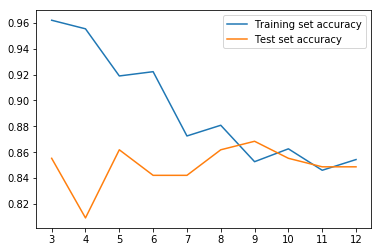

In [22]:
plt.plot(training_error, label = 'Training set accuracy')
plt.plot(test_error, label = 'Test set accuracy')
plt.legend()
plt.xticks(np.arange(0, 10), np.arange(3, 13))
plt.show()

### 2. Naive Bayes 

With Naive Bayes classifier we predict the class of a new $x$ to be the most probable lable given model and training data $(x_1, y_1), ..., (x_n, y_n)$.

#### Bayes Classifier
Before talking about the algorithm of Naive Bayes, we need to know **Bayes Classifer**:

$$f(x) = \operatorname*{arg\,max}_{y \in Y} P(Y = y| X = x)$$

For a particular input $x$, predict the label to be the most probable label conditioned on $x$ according to the true underlying distribution given to us from nature.

From Bayes rule we equivalently have
$$ f(x) \approx \operatorname*{arg\,max}_{y \in Y} P(Y = y) \times P(Y = y| X = x) $$
- $P(Y = y)$ is called the $\textit{class prior}$.
- $P(X = x|Y = y)$ is called the $\textit{class conditional distribution}$ of X.
- In practice we don't know either of these, so we approximate them.

Aside: If $X$ is a continuous-valued random variable, replace $P(X = x|Y = y)$ with class conditional density $p(x|Y=y)$.

Problem: We can't construct the Bayes classifier without knowing $P(Y = y|X = x)$, or equv., $P(X = x|Y = y)$ and $P(Y = y)$. All we have are labeled examples drowm from the distribution.

#### Naive Bayes Algorithm
We have to $\textit{define } p(X = x|Y = y)$.

Naive Bayes is a Bayes classifier that makes the assumption
$$p(X = x|Y = y) = \prod_{j=1}^{d}p_j(x(j)|Y = y),$$
i.e., it treats the dimension of $X$ as $\textit{conditionally independent}$ given $y$. 

Note: Each mimension might not be independent with each other, but they are conditionally independent given y.

#### Discriminative Model vs. Generative Model

Bayes Classifer and Naive Bayes are ***generative models***. Unlike distriminative models, generative models consider the joint probability distribution on $X \times y, P(X, y)$, make the prediction on the probability of each lable $y$ given $X$, $p(y|X = x)$, and then pick the most likely lable $y$.

##### Discriminative Algorithms
- Idea: model $p(y|x)$, conditional distribution of $y$ given $x$.
- In Discriminative Algorithms: find a decision boundary that separates positive from negative example.
- To predict a new example, chec on which side of the decision boundary it falls.
- Model $p(y|x)$ directly

##### Generative Algorithms
- Idea: Build a model for what positive examples look like and build a different model for what negative example look like.
- To predict a new example, match it with each of the models and see which match is best.
- Model $p(x|y)$ and $p(y)$!
- Use Bayes rule to obtain $p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

The definition of generative and distriminative models:
- a generative model is a model of the conditional probability of the observable $X$, given a target $y$, symbolically, $P(X|Y=y)$
- a discriminative model is a model of the conditional probability of the target $Y$, given an observation $x$, symbolically, $P(Y|X=x)$

source: https://en.wikipedia.org/wiki/Generative_model#Definition



In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_prob = gnb.predict_proba(X_test)[:,1]

print("Accuracy on training set:", gnb.score(X_train, y_train))
print("Accuracy on test set:", gnb.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

Accuracy on training set: 0.809602649007
Accuracy on test set: 0.736842105263
AUC: 0.739505332426


### 3. Logistic Regression
Let $(x_1, y_1),...,(x_n, y_n)$ be a set of binary labeled data with $y \in {-1, +1}$. $\textit{Logistic regression}$ models each $y_i$ as independently generated, with

$$P(y_i = +1|x_i, w) = \sigma(x_i^Tw), \ \ \sigma(x_i; w) = \frac{e^{x_iTw}}{1 + e^{x_iTw}}.$$

#### Sigmoid Function
From **Linear Discriminative Analysis**, we can directly plug in the **hyperplane representation** for the **log odds**. ***(See Appendix A: Concepts for Logistic Regression & Appendix B: Linear Classifiers)***

$$\ln\frac{p(y = +1|x)}{p(y = -1|x)} = x^Tw + w_0$$

Note: No restrictions on $w$ and $w_0$ compared to LDA.

Setting $p(y = -1|x) = 1 - p(y = -1|x)$, solve for $p(y = +1|x)$ to find 
$$ p(y = +1|x) = \frac{exp^{x^Tw + w_0}}{1 + exp^{x^Tw + w_0}} = \sigma(x^tw + w_0). $$

- This is called the sigmoid function
- We have chosen $x^Tw + w_0$ as the $\textit{link function}$ for log odds.
- If $x^Tw > 0$, then $\sigma(x^Tw) > 1/2$ and predict $y = +1$, and vice versa.
- We now get **a confidence in our prediction** via the probability of $\sigma (x^Tw)$.


#### Maximum Likelihood Estimation

Define $\sigma_i(w) = \sigma(x_i^Tw)$. The joint likihood of $y_1,...y_n$ is
$$p(y_1,...,y_n|x_1,...,x_n, w) = \prod_{i=1}^{n}p(y_i|x_i, w)
= \prod_{i=1}^{n}\sigma_i(w)^{\mathbb{I}(y_i=+1)}(1-\sigma_i(w))^{\mathbb{I}(y_i=-1)} 
= \prod_{i=1}^{n}\sigma_i(y_i \cdot w)$$

Note: here y = {+1, -1}

we want to maximize this over $w$.

The maximum likelihood solution for $w$ can be written 
$$ w_{ML} = \operatorname*{arg\,max}_{w} \sum_{i=1}^{n}\ln\sigma_i(y_i\cdot w)
= \operatorname*{arg\,max}_{w} L $$

We can't directly set $\nabla_w L = 0$, so we need an iterative algorithm. At step $t$, we can update
$$ w^{(t+1)}=w^{(t)}+\eta\nabla_wL \ \ \nabla_wL = \sum_{i=1}{n}(1-\sigma_i(y_i\cdot w))y_ix_i $$


#### Algorithm

**Input**: Training data $(x_1, y_1),...,(x_n, y_n)$ and step size $\eta > 0$
1. **Set** $w^{(1)} = \overrightarrow{0}$
2. **For step** $t = 1,2,...$ **do**
    - Update $w^{(t+1)} = w^{(t)} + \eta\sum_{i=1}^{n}(1-\sigma_i(y_i\cdot w))y_ix_i$

In [25]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
# Build logistic model with L2 regularization
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1, 10, 100], 
              'tol': [1e-4, 1e-5], 
              'max_iter': [100, 500]}
gs_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
gs_lr.fit(X_train, y_train)
print("Best Parameters:", gs_lr.best_params_)
print("Accuracy on Training Set:", gs_lr.best_score_)

y_pred_prob = gs_lr.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_lr.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

In [27]:
y_pred_prob = gs_lr.predict_proba(X_test)
print(y_pred_prob[:5])
print(y_pred[:5])
print(y_test[:5])

[[  1.79862153e-05   9.99982014e-01]
 [  9.96741352e-01   3.25864761e-03]
 [  9.99969169e-01   3.08313593e-05]
 [  1.18302932e-02   9.88169707e-01]
 [  5.25225892e-01   4.74774108e-01]]


NameError: name 'y_pred' is not defined

In [ ]:
# Moving the threshold does not improve prediction
for t in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    y_pred_rev = [1 if i[1] > t else 0 for i in y_pred_prob]
    print('Threshold: {}, Accuracy: {}, AUC: {}'.format(t, accuracy_score(y_pred_rev, y_test))

When threshold is changed to 0.55, the accuracy and AUC is higher than the original prediction.

### 4. Support Vector Machine

With two linearly separable classes, choose a hyperplane such that its distance to the **closest point in each class** is maximized to achieve good generalization (low prediction error).

#### Convex Sets and Convex Hulls
Where a seperating hyperplane may be placed depends on the "outer" points on the sets. Points in the center do not matter. In geometric terms, we can represent each class by the smallest convex set which contains all point in the class. This is called a $\textit{convex hull}$.

A convex hull is defined by all possible weighted averages of points in a set. That is, let $x_1,...x_n$ be the data coordinates. Every point $x_0$ in the convex hull can be reached by setting
$$ x_0 = \sum_{i=1}^{n}\alpha_1x_1, \ \ \alpha_i \geq0, \ \ \sum_{i=1}^{n}\alpha_1 = 1,$$
for some $(\alpha_1,...\alpha_n)$. No point outside the convex hull can be reached this way.

#### Algorithm
For $n$ seperate points $(x_1,y_1),...,(x_n,y_n)$ with $y_i \in {\pm1}$, solve:
$$ \min_{w, w_0} \frac{1}{2}\|w\|^2 $$
subject to
$$ y_i(x_i^Tw + w_0) \geq 1 \ \ for\ i = 1,...,n$$

- If there exists a hyperplan $H$ that separates the classes, we can scale $w$ so that $y_i(x_i^Tw+w_0)>1$ for all $i$.
- This formula only has a solution when the classes are linearly separable.

Solving above foluma would require $\textit{Lagrange multipliers}$. After derived with $\textit{Lagrange multipliers}$, the formula will eventually turn into:
$$\min_{\alpha_1,...\alpha_n}\bigg|\bigg(\sum_{i\in S_1}\frac{\alpha_i}{C}x_i\bigg) - 
\bigg(\sum_{j\in S_0}\frac{\alpha_j}{C}x_j\bigg)\bigg|^2,$$
where 
- $S_i$ and $S_0$ are the sets of $x$ in class $+1$ and $-1$
- $C:=\sum_{i\in S_1}\alpha_u = \sum_{j\in S_0}\alpha_j,\ \ \alpha_i\geq0$

Therefore, the algorithm is to find the closest points in the convex hulls constructed from the data in class $+1$ and $-1$.

#### Soft-Margin SVM

If the data isn't linearly separable, permit training data be on wrong side of hyperplane at a cost by replacing the training rule $y_i(x_i^Tw + w_0) \geq 1$  with 
$$y_i(x_i^Tw+w_0)\geq 1 - \xi_i, \ \ with \ \ \xi_i \geq0.$$

The $\xi_i$ are also called $\textit{slack variables}.$

The function therefore becomes:
$$ \min_{w, w_0,\xi_1,...\xi_n} \frac{1}{2}\|w\|^2 + \lambda\sum_{i=1}^{n}\xi_i$$
subject to
$$ y_i(x_i^Tw + w_0) \geq 1 - \xi_i \ \ for\ i = 1,...,n$$
$$ \xi_i \geq 0 \ \ for \ \ i = 1,...,n$$

- If $\lambda$ is very small, we're happy to misclassify.
- For $\lambda \rightarrow \infty$, we recover the original SVM because we want $\xi_i=0$.
- We can use cross-valudation to choose $\lambda$

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
%%time
#l2 penalty
param_grid = {'tol': [1e-4, 1e-5, 1e-6],
              'C': [0.1, 1, 10],
              'max_iter': [500, 1000, 1500]}
gs_lsvc = GridSearchCV(LinearSVC(), param_grid, cv=5)
gs_lsvc.fit(X_train, y_train)
print("Best Parameters:", gs_lsvc.best_params_)
print("Accuracy on Training Set:", gs_lsvc.best_score_)
print("Accuracy on Test Set:", gs_lsvc.score(X_test, y_test))
# LinearSVC does not return probability of prediction to calculate AUC

In [ ]:
import warnings

In [ ]:
warnings.simplefilter('ignore')
#l1 penalty
lsvc = LinearSVC(loss='l2', penalty='l1', dual=False)
gs_lsvc_l1 = GridSearchCV(lsvc, {'C': [0.1, 1, 10]}, cv=5)
gs_lsvc_l1.fit(X_train, y_train)
print("Best Parameters:", gs_lsvc_l1.best_params_)
print("Accuracy on Training Set:", gs_lsvc_l1.best_score_)
print("Accuracy on Test Set:", gs_lsvc_l1.score(X_test, y_test))
# LinearSVC does not return probability of prediction to calculate AUC

### 5. Kernelizing SVM

#### Kernel
A kernel $K(\cdot,\cdot) : \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$ is a symmetric function defined as follows:

For any set of $n$ data points $x_1,...,x_n \in \mathbb{R}^d$, the $n\times n$ matrix $K$, where $K_{ij} = K(x_i, x_j)$, is $\textit{positive semidefinite}$. (Note: The output of the kernel function is greater or equal to 0.)

Intuitively, this means $K$ satisfies the properties of a covariance matrix.

#### Mercer's theorem
If the function $K(\cdot,\cdot)$ satisfies the above properties, then there exists a mapping $\phi:\mathbb{R}^d\rightarrow\mathbb{R}^D$ such that
$$k(x_i, x_j) = \phi(x_i)^T\phi(x_j).$$

(Note: If this is satisfied for every single set of n vectors in $\mathbb{R}^d$ where $n$ is arbitrary and the vectors themselves are arbitrary, **then there exists some function** $\phi$, which is a function that takes in any particular $x$ and it performs the same function on that particular $x$ to map it to another space. And we can then have this dot product representation of the kernel function.)

If we first define $\phi(\cdot)$, the mapping function, and then $K$, then this is obvious. However, sometimes we first define $K(\cdot,\cdot)$ and avoid ever using $\phi(\cdot)$.

(Note: We use kernel to get results of the dot products of two $x_i$ and $x_j$ mapped to a higher place without actually mapping the $x_i$ and $x_j$ and calculating the dot product.)

#### RBF
By far the most popular kernel is the Gaussian kernel, also called the radiial basis function (RBF),
$$ K(x, x') = \alpha \ exp\big\{ - \frac{1}{b}\|x-x'\|^2 \big\}. $$

- It takes into account proximity in $\mathbb{R}^d$. Things close together in space have larger value (as defined by kernel width $b$).

In this case, the mapping $\phi(x)$ that produces the RBF kernel is $\textit{infinite dimensional}$ (it's a continuous function instead of a vector). Therefore
$$K(x,x') = \int\phi_t(x)\phi_t(x')dt.$$

(Note: there's a function of $x$ and $t$ such that this kernel results by integratign the product of those two functions.)
- $K(x,x')$ is like a Gaussian on $x$ with $x'$ as the mean (or vice versa).

#### Algorithm
Map the data into higher dimension using the function $\phi(x_i)$,
$$ \min_{w, w_0,\xi_1,...\xi_n} \frac{1}{2}\|w\|^2 + \lambda\sum_{i=1}^{n}\xi_i$$
subject to
$$ y_i(\phi(x_i)^Tw + w_0) \geq 1 - \xi_i \ \ for\ i = 1,...,n$$
$$ \xi_i \geq 0 \ \ for \ \ i = 1,...,n$$

To classify a new point:
$$ y_0 = sign\big(\sum_{i=1}^{n}\alpha_iy_i\phi(x_0)T\phi(x_i)+w_0)\big)=
sign(\sum_{i=1}^{n}\alpha_iy_iK(x_0,x_i)+w_0\big)$$

- We're still learning a linear classifier, in the higher dimensional map space, but when we look at what the decision is in the original space, we get non-linear decision boundaries.
- In practice, we choose a kernel function (e.g., RBF) and use cross-validation for $\lambda$ parameter and RBF kernel width.

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1e-2, 1/753, 1e-4],
              'tol': [1e-3, 1e-4, 1e-5],
              'max_iter': [500, 1000]}
gs_svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)
gs_svc.fit(X_train, y_train)
print("Best Parameters:", gs_svc.best_params_)
print("Accuracy on Training Set:", gs_svc.best_score_)

y_pred_prob = gs_svc.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_svc.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

So far support vector machine with kernel generates the best results.

### 6. Decision Tree
A decision tree maps input $x \in \mathbb{R}^d$ to output $y$ using binary decision rules:
- Each node in the tree has a splitting rule.
- Each leaf node is associated with an output value (outputs can repeat)

Each splitting rule is of the form $h(x) = \mathbb{I}\{x_j>t\}$ for some dimension $j$ of $x$ and $t\in\mathbb{R}$. Using these transition rules, a path to a leaf node gives the prediction.

The basic method for learning tree is with a top-down greedy algorithm. Measure of quality of prediction include
1. Classificataion error: $1 - \max_kp_k$
2. Gini index: $1 - \sum_{k}p_k^2$
3. Entrophy: $-\sum_{k}p_k\ln p_k$

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 8, None],
              'min_samples_split': [2, 3, 5]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gs_dt.fit(X_train, y_train)
print("Best Parameters:", gs_dt.best_params_)
print("Accuracy on Training Set:", gs_dt.best_score_)

y_pred_prob = gs_dt.predict_prob(X_test)[:,1]
print("Accuracy on Test Set:", gs_dt.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

## III. Model Improvement

### Feature Engineering
So far each observation of a patient has been treated as one instance. To extract more information for each patient, the three observations will be grouped into one and the mean, max, and min of each feature will be calculated, so that each instance represent as much information for one patient as possible.

In [ ]:
df_mean = df.groupby('id').mean().drop(['class'], axis=1).add_suffix('_mean')
df_min = df.groupby('id').min().drop(['class'], axis=1).add_suffix('_min')
df_max = df.groupby('id').max().drop(['class'], axis=1).add_suffix('_max')
X = pd.concat([df_mean, df_min, df_max], axis=1,
              join_axes = [df.groupby('id').mean().index])
X['gender'] = df[['gender', 'id']].drop_duplicates().reset_index(['id']).drop(['id'], axis=1)
# Get X and y datasets
#X = df_new.iloc[:,:-1]
y = df[['class', 'id']].drop_duplicates().reset_index(['id']).drop(['id'], axis=1)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.info()

### PCA
Now there are 2257 features in the dataset. Considering the massive number of features, using PCA to reduce features and leave only more discriminative ones would improve modeling speed and potentially prediction performance.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
pca = PCA()
pca.fit(scaler.fit_transform(X))

In [ ]:
df_pca = pd.DataFrame({'variance_ratio': pca.explained_variance_ratio_})
df_pca['cumulated_ratio'] = df_pca['variance_ratio'].cumsum()
df_pca.head()

In [ ]:
plt.bar(df_pca.index[:100], df_pca['variance_ratio'][:100])
plt.show()

In [ ]:
plt.bar(df_pca.index[:100], df_pca['cumulated_ratio'][:100])
plt.show()

In [ ]:
for i in [0.8, 0.85, 0.9, 0.95]:
    print('Top {} features explains {} of the variance.'.format(df_pca[df_pca['cumulated_ratio'] > i].index[0], i))

### Build Pipeline
Use pipeline on standard scaler, PCA, and SVC, the best model so far, to see if there's any improvement.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
%%time
pipeline = Pipeline([('Scaler', StandardScaler()),
                     ('PCA', PCA()),
                     ('SVC', SVC(probability=True))])
parameters = {'PCA__n_components': [100, 150, 200],
              'SVC__C': [0.1, 1, 10, 100],
              'SVC__gamma': [1e-3, 1e-4, 1e-5],
              'SVC__tol': [1e-3, 1e-4, 1e-5],
              'SVC__max_iter': [500, 1000, 1500]}
gs_pca_svc = GridSearchCV(pipeline, param_grid=parameters, cv=5)
gs_pca_svc.fit(X_train, y_train)
print("Best Parameters:", gs_pca_svc.best_params_)
print("Accuracy on Training Set:", gs_pca_svc.best_score_)

y_pred_prob = gs_pca_svc.predict_proba(X_test)
print("Accuracy on Test Set:", gs_pca_svc.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

After feature engineering and PCA, the accuracy on test set and the AUC both improved.

## IV. Model Selection

Apply pipeline on all models to compare the best performance on accuracy and AUC.

In [ ]:
%%time
warnings.simplefilter('ignore')
kNN = GridSearchCV(Pipeline([('Scaler', StandardScaler()), 
                             ('PCA', PCA()), ('kNN', KNeighborsClassifier())]),
                   param_grid={'PCA__n_components': [100, 150, 200],
                               'kNN__n_neighbors': np.arange(3, 6)}, cv=5)

NB = GridSearchCV(Pipeline([('scaler', StandardScaler()), ('PCA', PCA()), ('NB', GaussianNB())]),
                  param_grid={'PCA__n_components': [100, 150, 200]}, cv=5)

LR = GridSearchCV(Pipeline([('Scaler', StandardScaler()), 
                            ('PCA', PCA()), ('LR', LogisticRegression())]),
                  param_grid={'PCA__n_components': [100, 150, 200],
                              'LR__penalty': ['l1', 'l2'],
                              'LR__C': [0.1, 1, 10, 100],
                              'LR__tol': [1e-4, 1e-5], 
                              'LR__max_iter': [100, 500]}, cv=5)

SVM2 = GridSearchCV(Pipeline([('Scaler', StandardScaler()), 
                              ('PCA', PCA()), ('SVC', LinearSVC())]),
                    param_grid={'PCA__n_components': [100, 150, 200],
                                'SVC__tol': [1e-4, 1e-5, 1e-6],
                                'SVC__C': [0.1, 1, 10],
                                'SVC__max_iter': [500, 1000, 1500]}, cv=5)

SVM1 = GridSearchCV(Pipeline([('Scaler', StandardScaler()), ('PCA', PCA()), 
                              ('SVC', LinearSVC(loss='l2', penalty='l1', dual=False))]),
                    param_grid={'PCA__n_components': [100, 150, 200],
                                'SVC__C': [0.1, 1, 10]}, cv=5)

SVM = GridSearchCV(Pipeline([('Scaler', StandardScaler()), ('PCA', PCA()),
                             ('SVC', SVC(probability=True))]),
                   param_grid={'PCA__n_components': [100, 150, 200],
                               'SVC__C': [0.1, 1, 10],
                               'SVC__gamma': [1e-2, 1/753, 1e-4,],
                               'SVC__tol': [1e-3, 1e-4, 1e-5],
                               'SVC__max_iter': [500, 1000]}, cv=5)

DT = GridSearchCV(Pipeline([('Scaler', StandardScaler()), 
                            ('PCA', PCA()), ('DT', DecisionTreeClassifier())]),
                  param_grid={'PCA__n_components': [100, 150, 200],
                              'DT__criterion': ['gini', 'entropy'],
                              'DT__max_depth': [3, 5, 8, None],
                              'DT__min_samples_split': [2, 3, 5]}, cv=5)

models = {'Naive Bayes': NB, 'Logistic Regression': LR, 
          'SVM-L2': SVM2, 'SVM-L1': SVM1, 'SVM': SVM, 'Decision Tree': DT}

for k in models:
    models[k].fit(X_train, y_train)
    print("Best Parameters of {}:".format(k), models[k].best_params_)
    print("Accuracy on Training Set:", models[k].best_score_)
    print("Accuracy on Test Set:", models[k].score(X_test, y_test))
    if k not in ['SVM-L2', 'SVM-L1']:
        print("AUC:", roc_auc_score(y_test, models[k].predict_proba(X_test)))
    print("\n")

SVM model with kernel trick got the best results, followed by logistic regression and linear SVC with L1 penalty.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

### ROC Curve
Here only the best models, SVC and logistic regression are focused.

In [ ]:
y_pred_prob_svm = SVM.predict_proba(X_test)[:,1]
y_pred_prob_lr = LR.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_svm, tpr_svm, label = 'Support Vector Machine')
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression')
plt.legend()
plt.show()

It seems logistic regression has bigger area under ROC curve.

### Classification Report

In [ ]:
print("Support Vector Machine:")
print(classification_report(y_test, SVM.predict(X_test)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_svm)))

In [ ]:
print("Support Vector Machine:")
print(classification_report(y_test, LR.predict(X_test)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob_lr)))

comments

## V. Appendix

### Appendix A: Concepts for Logistic Regression:

#### A1. Binay Classification Type
Input $x_i \in \mathbb{R}^b$ and output $y_i \in {\pm1}$

we define a $\textit{classifier f}$, which makes prediction $y_i = f(x_i, \Theta)$ based on a function of $x_i$ and parameters $\Theta$. In other works $f: \mathbb{R}^d \rightarrow {-1, +1}$

In **Bayes classificaiton** framework, $\Theta$ contains:
1.  class prior probabilities on $y$,
2. parameters for calss-dependent distribution on $x$.

In **linear classification** framework, the prediction is linear in the parameters $\Theta$.

**Bayes classification** and **linear classification** are connected through ***log odds***.

#### A2. Log Odds
With Bayes classifier, we declare class $y=1$ if
$$ p(x|y = 1)P(y = 1) > p(x|y = 0)P(y = 0) $$

$$ \Updownarrow $$

$$ \ln\frac{p(x|y = 1)P(y = 1)}{p(x|y = 0)P(y = 0)} > 0 $$

The second line is referred to as the $\textit{log odds}$.

#### A3. Lineaer Discriminant Analysis
In the case where $p(x|y) = N(x| \mu_y, \Sigma)$ **(a single Gaussian with a shared covariance matrix)**

$$ \ln\frac{p(x|y = 1)P(y = 1)}{p(x|y = 0)P(y = 0)} =
\ln\frac{\pi_1}{\pi_0} - \frac{1}{2}(\mu_0 + \mu_1)^T\Sigma^{-1}(\mu_1 - \mu_0) + x^T\Sigma^{-1}(\mu_1 - \mu_0)$$

This is also called ***lineaer discriminant analysis*** (used to be called LDA).

S0 we ca write the decision rule for the Bayes classifer as a linear one:
$$ f(x) = sign(x^Tw + w_0) $$
where

$$ w_0 = \ln\frac{\pi_1}{\pi_0} - \frac{1}{2}(\mu_0 + \mu_1)^T\Sigma^{-1}(\mu_1 - \mu_0) $$
$$ w = \Sigma^{-1}(\mu_1 - \mu_0) $$

This Bayes classifier is one instance of a linear classifier.

Setting $w_0$ and $w$ this way may be too restrictive - it assumes single Gaussian with shared covariance. If we relax what values $w_0$ and $w$ can take we can do better. 

### Appendix B: Linear Classifiers

#### B1. Definition
A $\textit{binary linear classifier}$ is a function of the form
$$f(x) = sing(X^Tw + w_0),$$
where $w \in \mathbb{R}^d$ and $w_0 \in \mathbb{R}$. Since the goal is to learn $w, w_0$ from the data, we are assuming that $\textit{linear separability}$ in $x$ is an accurate property of the classes.

#### B2. Linear Separability
Two sets $A, B \subset \mathbb{R}^d$ arfe called linearly separable if

$$x^Tw + w_0 > 0 \ \ if \ \ x \in A (e.g, class +1)$$
$$x^Tw + w_0 < 0 \ \ if \ \ x \in B (e.g, class -1)$$

The pair $(w, w_0)$ defines an $\textit{affine hyperplane}$. It is important to develop the right geometric understanding about what this is doing.

#### B3. Two methods:

- **Least squares:** One simple idea is to treat classification as a regression problem. However, using regression for classification problem is not robust because it's sensitive to outliers
- **Perceptron:** The perceptron represents a first attempt at linear classification by directly learning the hyper plane defined by $w$. It is not used as mush anymore because of some drawbacks: convergence issues and the assumption on linear seperability.

## References for Model Introduction and Algorithms
- Applied Machine Learning Certification - Columnbia Engineering Executive Education
- Post Graduate Diploma of Applied Machine Learning and Artificial Intelligence - Columnbia Engineering Executive Education

#### Note: The coding was done through personal works and researches and not borrowed from the certification course.